<a href="https://colab.research.google.com/github/fanbyprinciple/BCexperiments/blob/master/netflix_shows_eda_for_beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

adapted from : https://www.kaggle.com/radmirzosimov/netflix-eda-with-plotly-seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

In [ ]:
%matplotlib inline
plt.style.use('seaborn-darkgrid')
palette =  plt.get_cmap('Set2')

In [ ]:
main_df = pd.read_csv('../input/netflix-shows/netflix_titles.csv')
main_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# displaying a bar for missing no

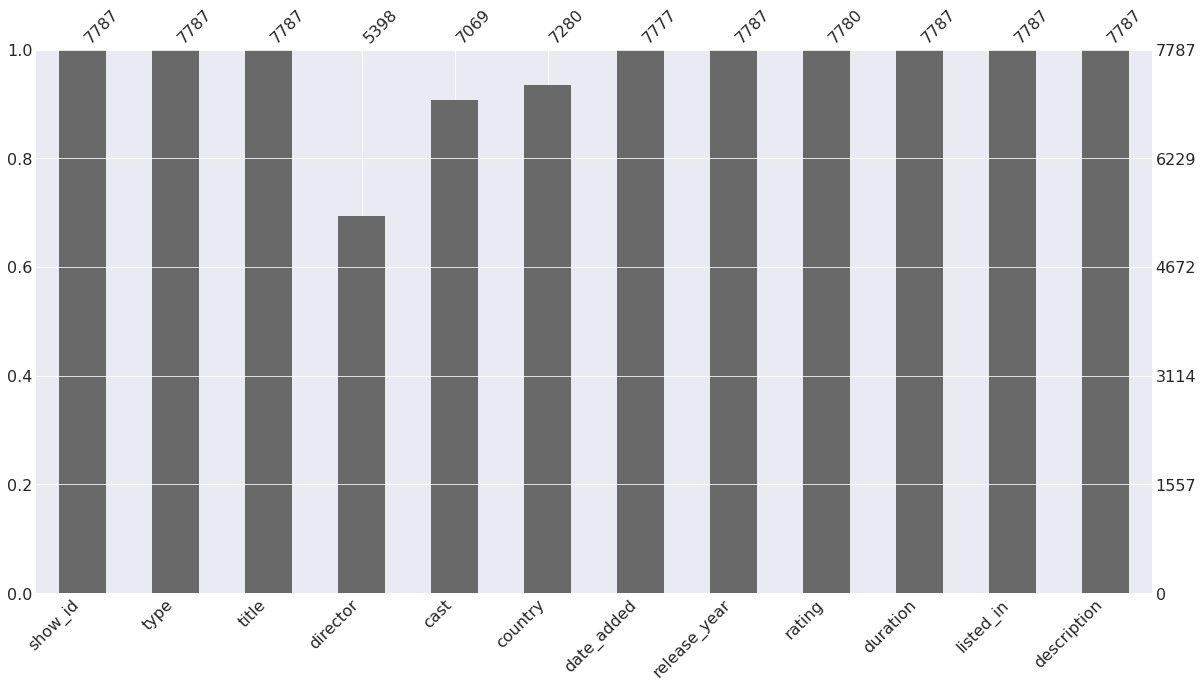

In [ ]:
msno.bar(main_df, figsize=(20,10))
plt.show()

missing value in director and cast

# display descriptions of values in columns

In [ ]:
main_df.describe(include=[np.number])

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
main_df.describe(include=[np.object])

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,14,216,492,7769
top,s2813,Movie,Alias Grace,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,1,5377,1,18,18,2555,118,2863,1608,334,3


In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# displaying a graph based on amount of content in country

In [ ]:
countries = main_df['country'].value_counts()[main_df['country'].value_counts(normalize=True)>0.01]
countries, countries.values

(United States     2555
 India              923
 United Kingdom     397
 Japan              226
 South Korea        183
 Canada             177
 Spain              134
 France             115
 Egypt              101
 Mexico             100
 Turkey             100
 Australia           83
 Taiwan              78
 Name: country, dtype: int64,
 array([2555,  923,  397,  226,  183,  177,  134,  115,  101,  100,  100,
          83,   78]))

In [ ]:
list_countries= countries.index
len(list_countries)

13

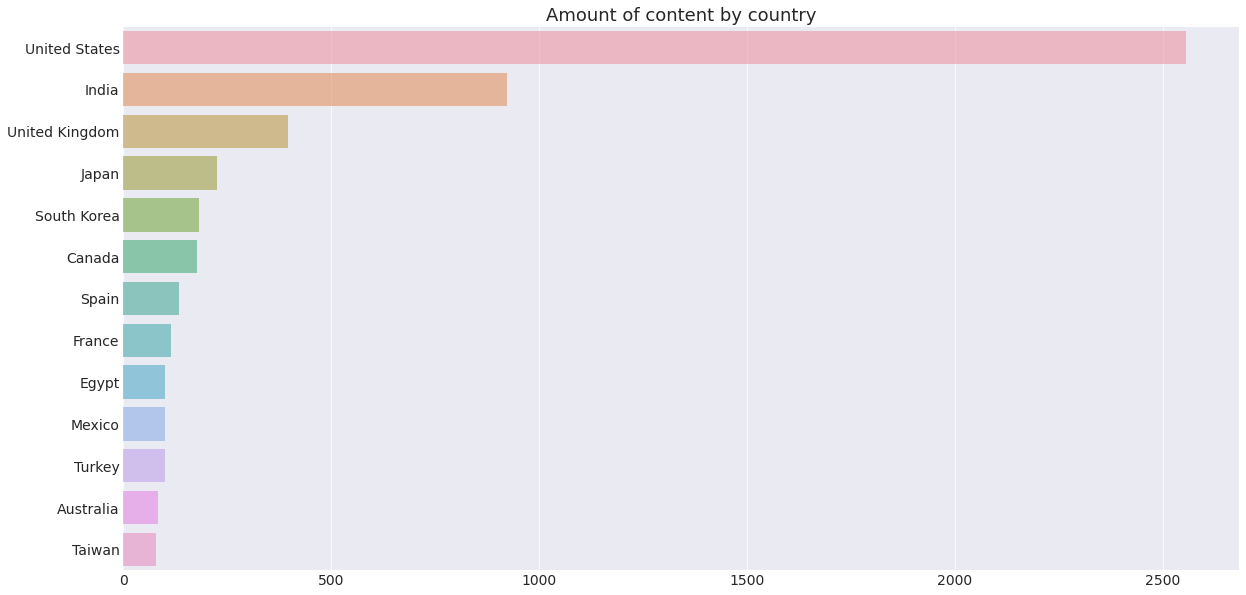

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Amount of content by country', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot(y=countries.index, x=countries.values,alpha=0.6)
plt.show()

In [ ]:
plt.figure(figsize=(14,7))
figure = px.pie(countries.sort_values(ascending=False).iloc[:20], values=countries.values, names=countries.index, title='part of the pie', color_discrete_sequence=px.colors.sequential.RdBu)
figure.show()

<Figure size 1008x504 with 0 Axes>

# looking at amount of TV shows vs movies

In [ ]:
types = main_df['type'].value_counts()
types

Movie      5377
TV Show    2410
Name: type, dtype: int64

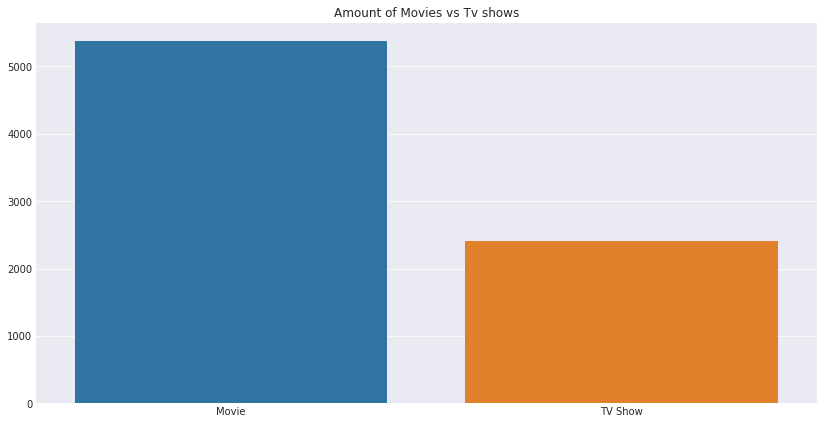

In [ ]:
plt.figure(figsize=(14,7))
sns.barplot(y=types.values, x=types.index)
plt.title('Amount of Movies vs Tv shows')
plt.show()

# Content growth throughout history

In [ ]:
movie = main_df['type']=='Movie'
tv_show = main_df['type']== 'TV Show'

In [ ]:
movies = main_df[movie]
tv_shows= main_df[tv_show]

movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


In [ ]:
movies.duration

1        93 min
2        78 min
3        80 min
4       123 min
6        95 min
         ...   
7781     88 min
7782     99 min
7783    111 min
7784     44 min
7786     90 min
Name: duration, Length: 5377, dtype: object

In [ ]:
MoviesProgress = movies['release_year'].value_counts().sort_index()
TvshowProgress = tv_shows['release_year'].value_counts().sort_index()

In [ ]:
MoviesProgress.index

Int64Index([1942, 1943, 1944, 1945, 1946, 1947, 1954, 1955, 1956, 1958, 1959,
            1960, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64')

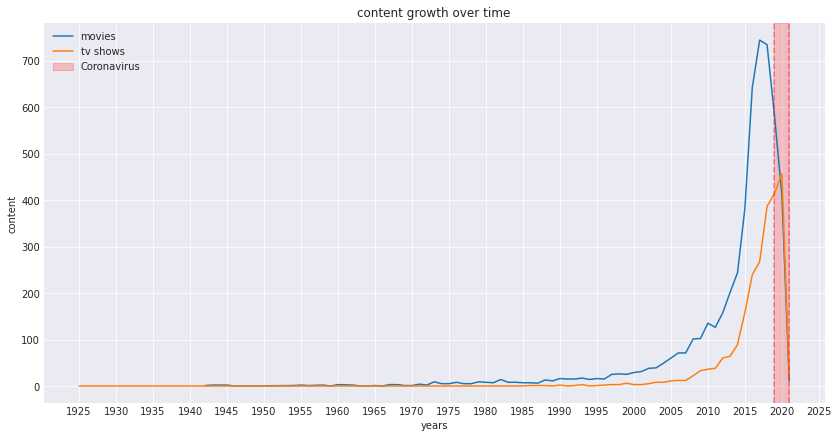

In [ ]:
plt.figure(figsize=(14,7))

plt.plot(MoviesProgress.index, MoviesProgress.values, label='movies' )
plt.plot(TvshowProgress.index, TvshowProgress.values, label='tv shows')

plt.axvline(2019, alpha=0.4, linestyle='--', color='r')
plt.axvline(2021, alpha=0.4, linestyle='--', color='r')
plt.axvspan(2019,2021, alpha=0.2, color='r', label='Coronavirus')

plt.xticks(list(range(1925,2026,5)))
plt.title('content growth over time')
plt.xlabel('years')
plt.ylabel('content')
plt.legend()
plt.show()

# Looking at the rating counts

In [ ]:
ratings = main_df['rating'].value_counts()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



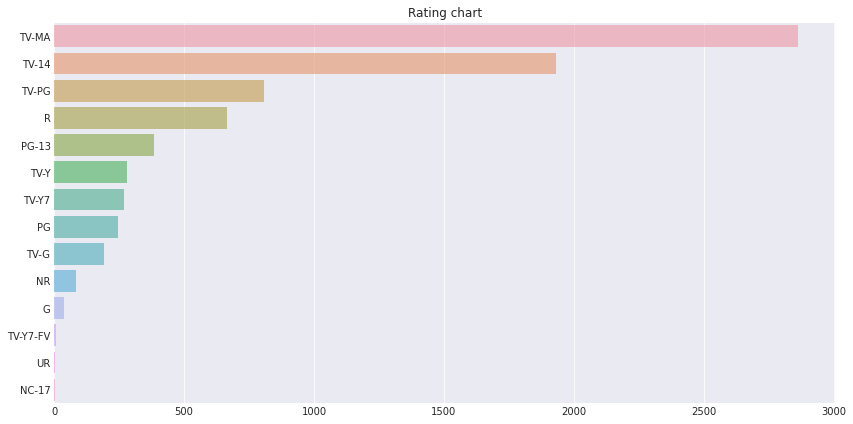

In [ ]:
plt.figure(figsize=(14,7))

plt.title('Rating chart')

sns.barplot(ratings.values,ratings.index, alpha=0.6)
plt.show()

tv ma is for mature audiences only.

In [ ]:
movies = main_df[main_df['type']=='Movie']
movies['duration'] = [i.split(' ')[0] for i in movies.duration.dropna()]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
[i.split(' ')[0] for i in movies.duration.dropna()][:5]

['93', '78', '80', '123', '95']

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



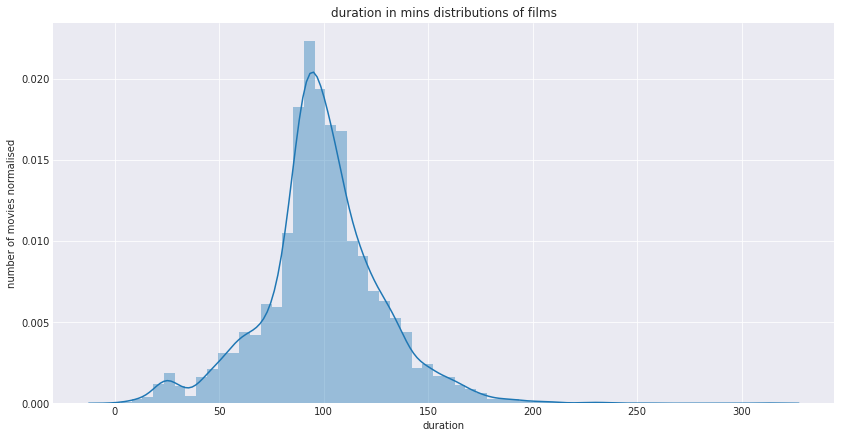

In [ ]:
plt.figure(figsize=(14,7))
plt.ylabel('number of movies normalised')
sns.distplot(movies['duration'], bins=60)
plt.title('duration in mins distributions of films')
# plt.yticks(list(range(0,200)))
plt.legend()
plt.show()

### Listing down the short movies

In [ ]:
movies = main_df[main_df['type']=='Movie']
print(movies.duration)
short = movies.sort_values('duration').iloc[:20]
short['duration'] = [int(i.split(' ')[0]) for i in short.duration.dropna()]
# short['title']

1        93 min
2        78 min
3        80 min
4       123 min
6        95 min
         ...   
7781     88 min
7782     99 min
7783    111 min
7784     44 min
7786     90 min
Name: duration, Length: 5377, dtype: object


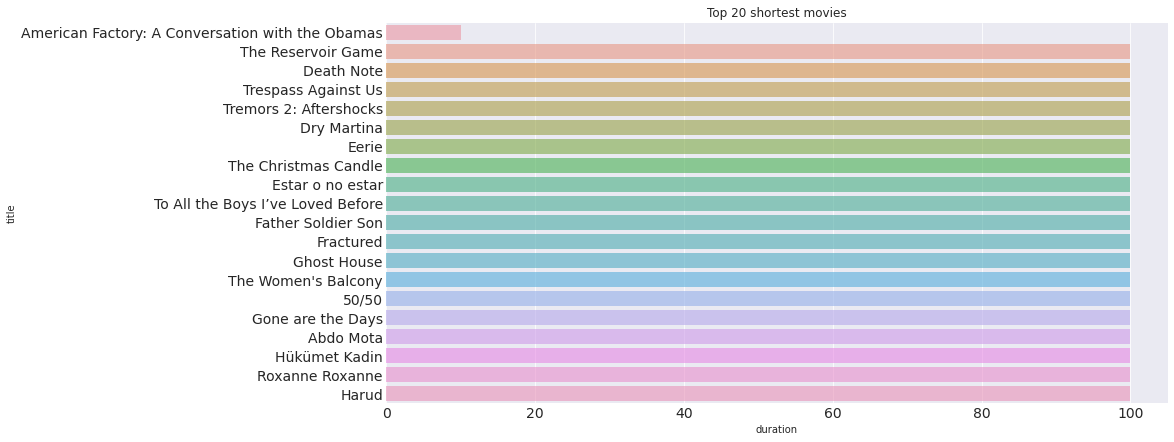

In [ ]:

plt.figure(figsize=(14,7))
plt.title('Top 20 shortest movies')
plt.tick_params(labelsize=14)
sns.barplot(y=short['title'], x=short['duration'],alpha=0.6)
plt.show()

In [ ]:
movies = main_df[main_df['type']=='Movie']
long = movies.duration.sort_values('duration').iloc[-20:]
long['duration'] = [int(i.split(' ')[0]) for i in long.duration.dropna()]
# short['title']

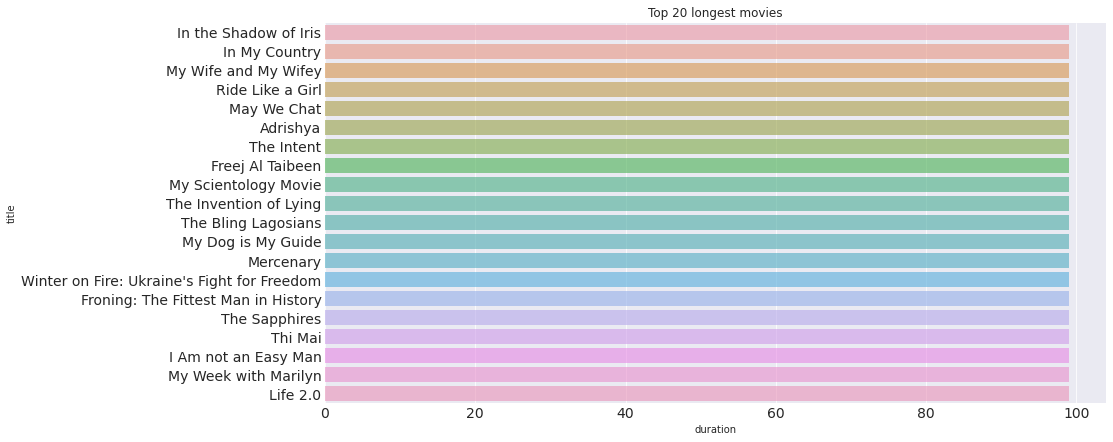

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Top 20 longest movies')
plt.tick_params(labelsize=14)
sns.barplot(y=long['title'], x=long['duration'],alpha=0.6)
plt.show()

# Lets look at the shows with a single season

In [ ]:
tv_Shows = main_df[main_df['type']=='TV Show']
tv_Shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7767,s7768,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
7775,s7776,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...


In [ ]:
short = tv_Shows.sort_values('duration').iloc[:20]
short['duration'] = [int(i.split(' ')[0]) for i in short.duration.dropna()]
# short['title']

In [ ]:
short

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3969,s3970,TV Show,Marvel's The Defenders,NaN,"Charlie Cox, Krysten Ritter, Mike Colter, Finn...",United States,"August 18, 2017",2017,TV-MA,1,"Crime TV Shows, TV Action & Adventure, TV Dramas","Daredevil, Jessica Jones, Luke Cage and Iron F..."
4782,s4783,TV Show,Part-Time Idol,NaN,"Hee-jeong Kim, Seung-un Hwang, Soo-hyun Lee, H...",NaN,"December 25, 2017",2017,TV-14,1,"International TV Shows, Korean TV Shows, TV Co...","After taking a break from the business, a musi..."
4771,s4772,TV Show,Parasyte: The Maxim,NaN,"Nobunaga Shimazaki, Aya Hirano, Kana Hanazawa,...",Japan,"May 15, 2020",2014,TV-MA,1,"Anime Series, International TV Shows, TV Horror",A teenager battles an onslaught of parasites f...
4766,s4767,TV Show,Paranormal,NaN,"Ahmed Amin, Razane Jammal, Ayah Samaha, Samaa ...",Egypt,"November 5, 2020",2020,TV-14,1,"International TV Shows, TV Dramas, TV Horror",After a skeptical hematologist is plunged into...
4765,s4766,TV Show,Paranoid,NaN,"Indira Varma, Robert Glenister, Dino Fetscher,...",United Kingdom,"November 17, 2016",2016,TV-MA,1,"British TV Shows, Crime TV Shows, Internationa...",When a woman is brutally murdered on a playgro...
4759,s4760,TV Show,Paprika,NaN,"Kaycie Chase, David Gasman, Tom Morton, Lee De...",NaN,"January 31, 2019",2018,TV-Y,1,Kids' TV,Stan and Olivia – the amazingly different Papr...
4750,s4751,TV Show,Pandemic: How to Prevent an Outbreak,NaN,NaN,United States,"January 22, 2020",2020,TV-14,1,"Docuseries, Science & Nature TV","In this docuseries, meet the heroes on the fro..."
4745,s4746,TV Show,Palazuelos mi rey,NaN,Roberto Palazuelos,NaN,"February 13, 2020",2019,TV-14,1,"International TV Shows, Reality TV, Spanish-La...",This reality series follows entrepreneur and s...
4744,s4745,TV Show,Pajanimals,NaN,"John Kennedy, Victor Yerrid, Donna Kimball, Al...",United States,"March 31, 2020",2011,TV-Y,1,Kids' TV,"From the comfort of their bedroom, the Pajanim..."
4734,s4735,TV Show,Padamu Aku Bersujud,NaN,"Syazwan Zulkifli, Sqikin Kamal, Leez Rosli, Bi...",NaN,"December 1, 2017",2015,TV-14,1,"International TV Shows, Romantic TV Shows, TV ...",The son of poor farmers leaves his village to ...


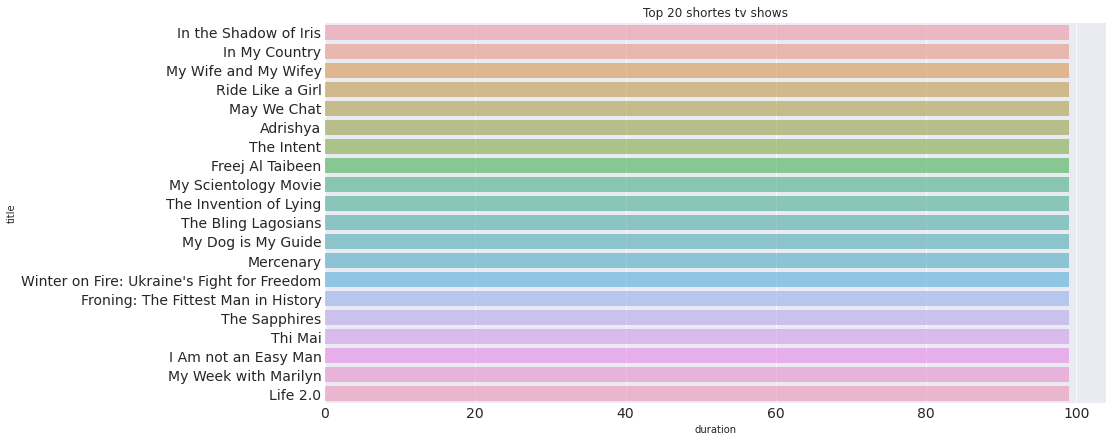

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Top 20 shortes tv shows')
plt.tick_params(labelsize=14)
sns.barplot(y=long['title'], x=long['duration'],alpha=0.6)
plt.show()